In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='length', ylabel='dwt'>

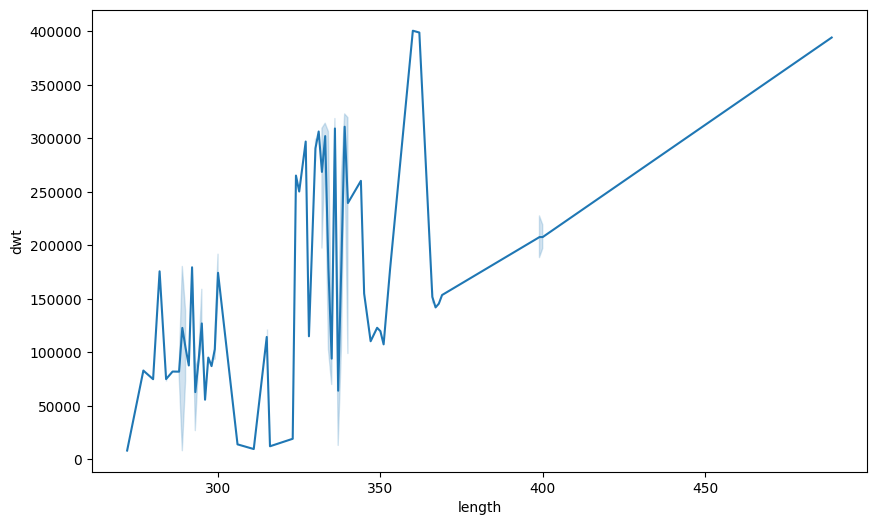

In [2]:
file = pd.read_csv("Cleaned_ships_data.csv")
df = file.groupby(by = "dwt") ["length"].mean().reset_index()
plt.figure(figsize=(10,6))
sb.lineplot(x="length", y="dwt", data=df)

<Axes: xlabel='ship_name', ylabel='count'>

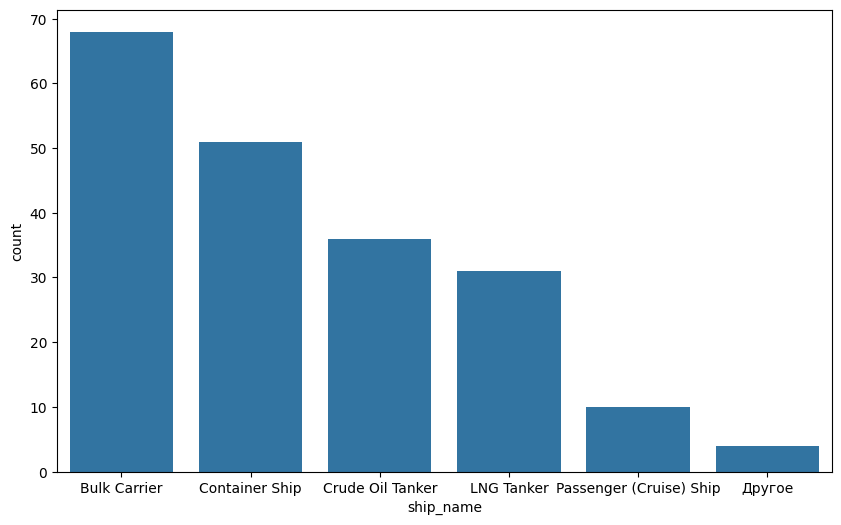

In [3]:
counts=file["ship_name"].value_counts()
min_amount = 10
df = file["ship_name"].apply(lambda x: "Другое" if counts[x] < min_amount else x).value_counts().reset_index()
plt.figure(figsize=(10,6))
sb.barplot(x="ship_name", y="count", data=df)


<Axes: xlabel='built_year', ylabel='count'>

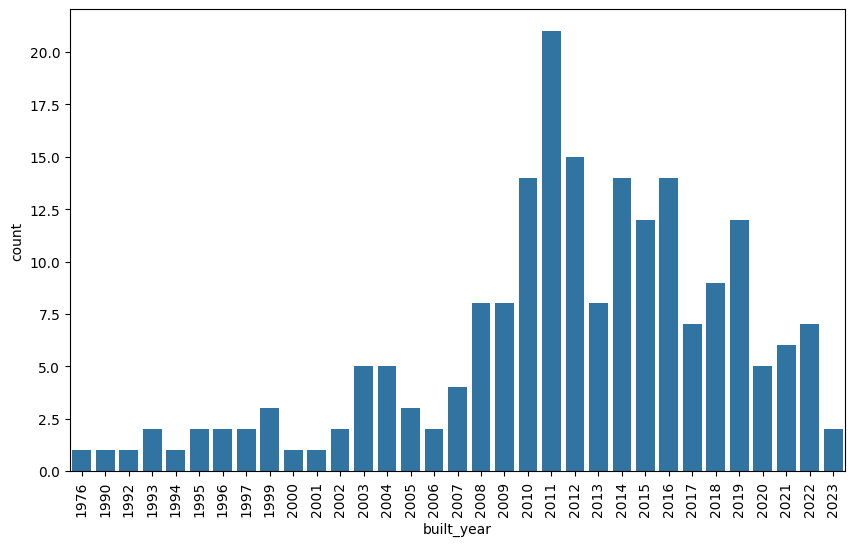

In [4]:
df = file["built_year"].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
sb.barplot(x="built_year", y="count", data=df)

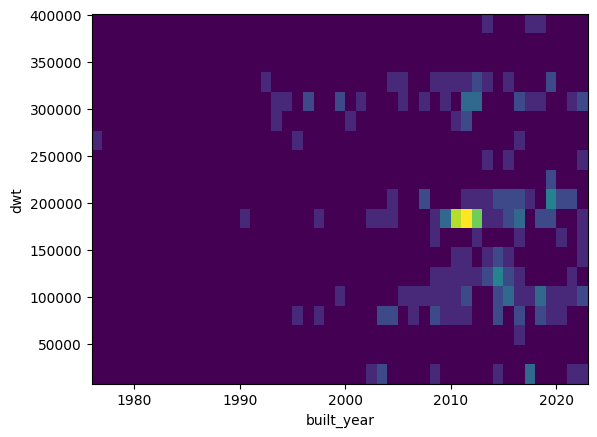

In [5]:
df = file[["built_year", "ship_name", "dwt"]]
dwt_bins = np.linspace(df['dwt'].min(), df['dwt'].max(), 20)
plt.hist2d(df["built_year"], df["dwt"], bins=[np.arange(df["built_year"].min(), df["built_year"].max() + 1), dwt_bins], cmap="viridis")
plt.xlabel("built_year")
plt.ylabel("dwt")
plt.show()

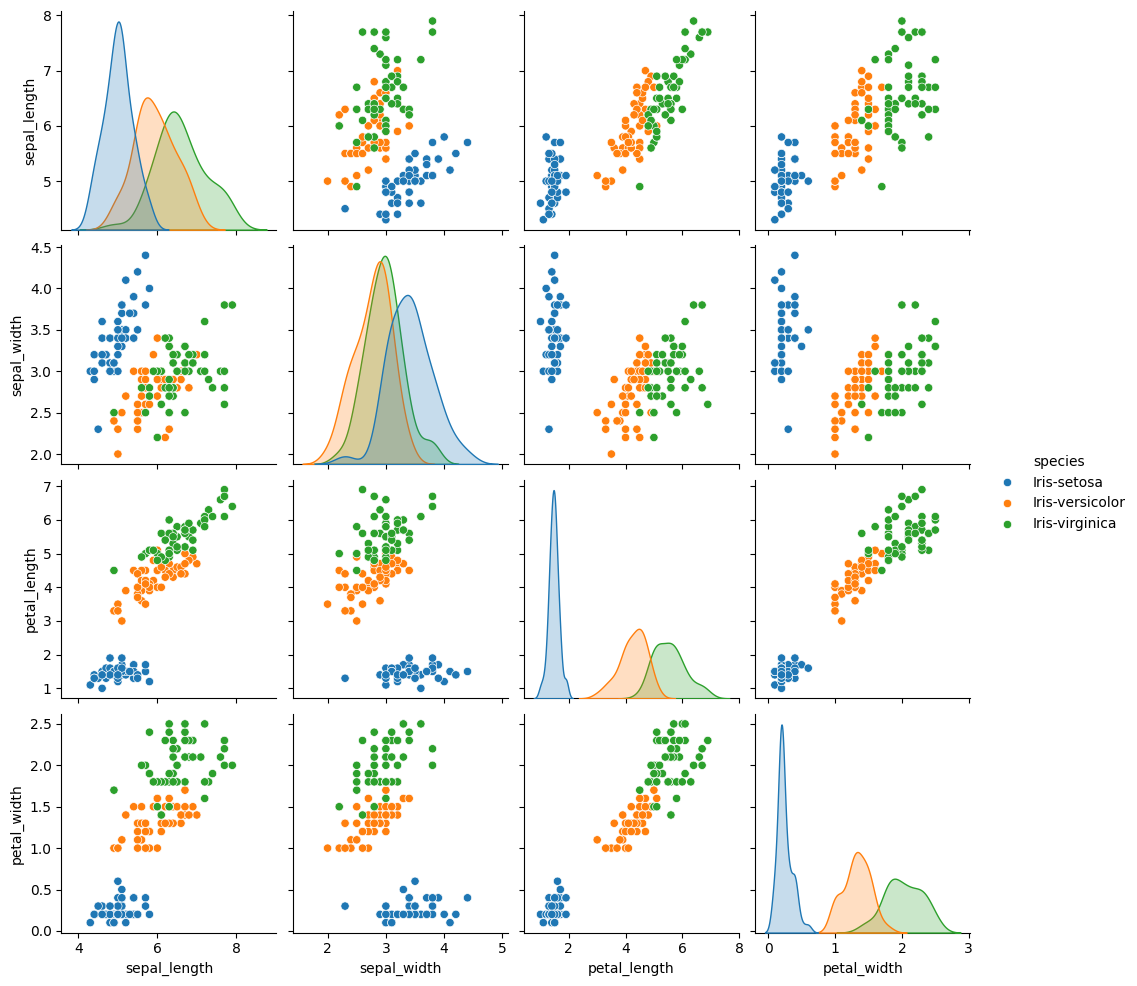

In [6]:
file2 = pd.read_csv("IRIS.csv")
sb.pairplot(file2, hue="species")

<Axes: xlabel='species', ylabel='sepal_length'>

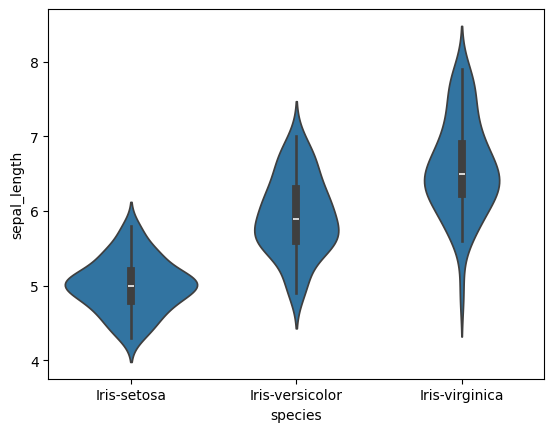

In [7]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[0])

<Axes: xlabel='species', ylabel='sepal_width'>

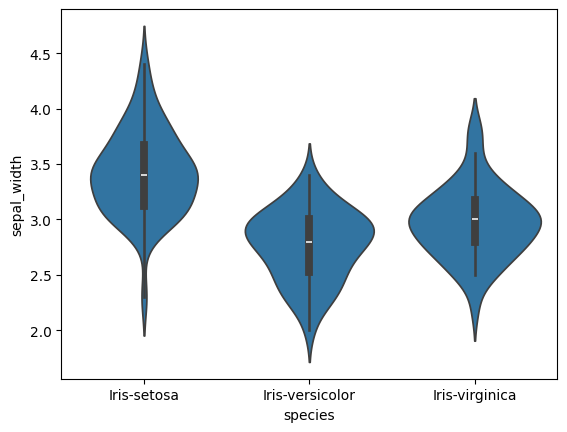

In [8]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[1])

<Axes: xlabel='species', ylabel='petal_length'>

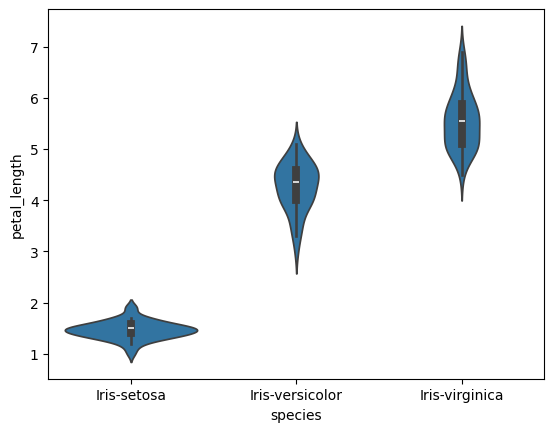

In [9]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[2])

<Axes: xlabel='species', ylabel='petal_width'>

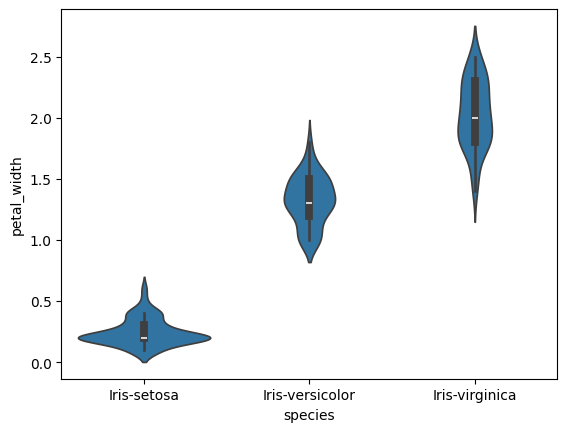

In [10]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[3])